<a href="https://colab.research.google.com/github/ChocolateCookieMonster/Capstone-Project/blob/main/MachineLearningIDS_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, roc_curve
from sklearn.feature_selection import RFE
import time
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
train = pd.read_csv('/content/drive/MyDrive/Datasets/Train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Test_data.csv')

In [ ]:
# Function to encode categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    return df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

train = encode_categorical(train)
test = encode_categorical(test)

In [ ]:
# Drop constant column
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# Dataset Description
print("Training Dataset Description:")
display(train.describe())

Training Dataset Description:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,1.053827,29.039139,6.982455,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.533860
std,2686.555640,0.426998,15.555601,2.679322,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.498862
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,46.000000,9.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,2.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Class Distribution
class_counts = train['class'].value_counts()
class_percentage = class_counts / class_counts.sum() * 100
class_distribution = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentage})
print("\nClass Distribution in Training Dataset:")
display(class_distribution)


Class Distribution in Training Dataset:


,Count,Percentage
1,13449,53.385996
0,11743,46.614004


In [ ]:
# Dataset Visualization
def visualize_data(df):
    # Distribution of each feature
    df.hist(bins=15, figsize=(15, 10))
    plt.suptitle('Feature Distribution')
    plt.show()

    # Class distribution
    sns.countplot(x='class', data=df)
    plt.title('Class Distribution')
    plt.show()

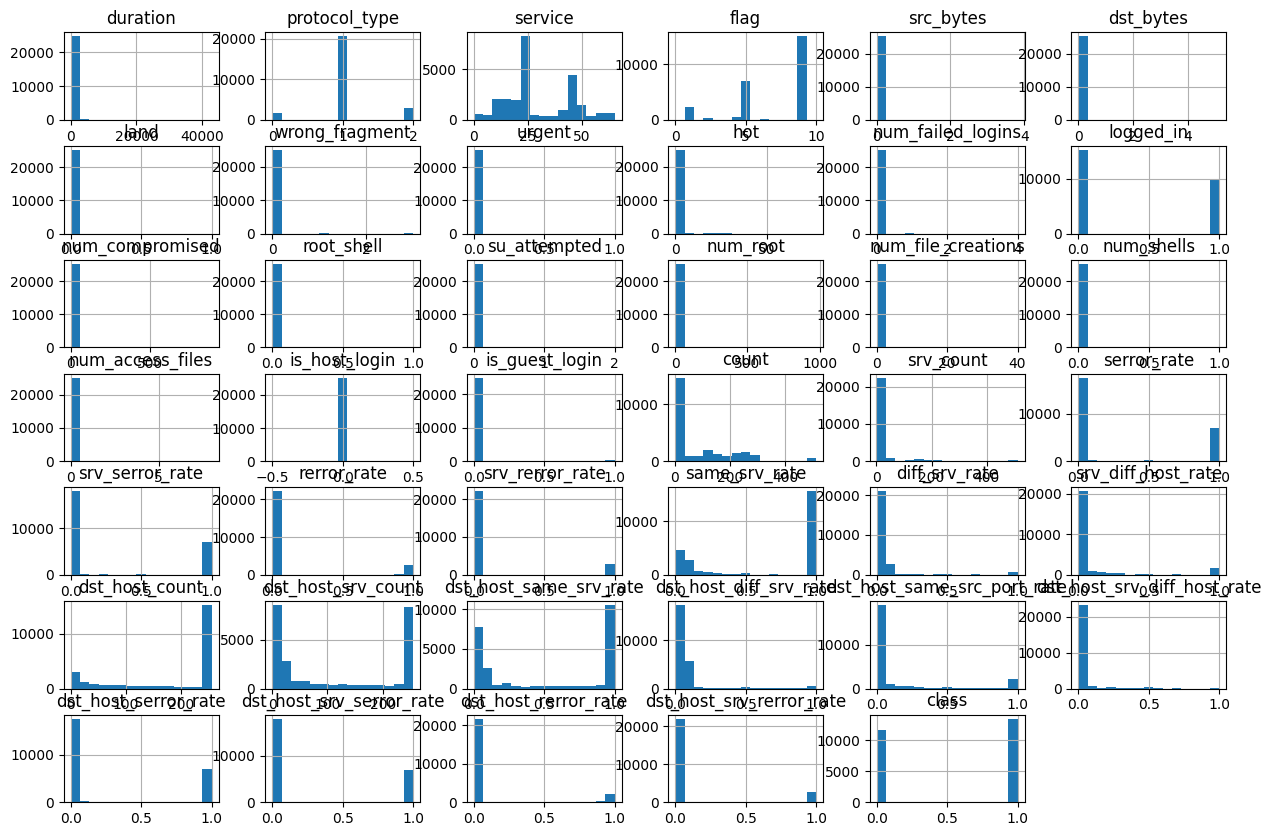

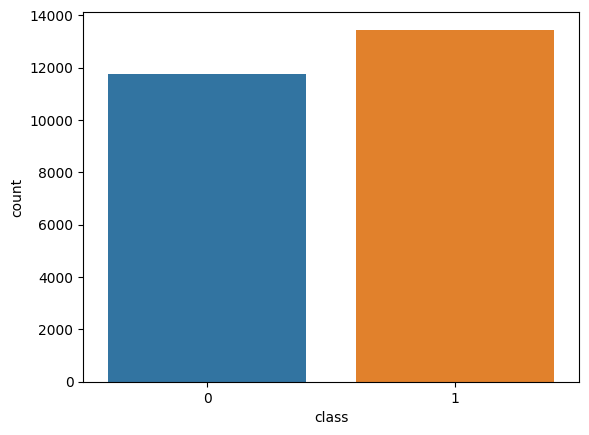

In [ ]:
# Visualize the train dataset
def visualize_data(df):
    df.hist(bins=15, figsize=(15, 10))
    plt.show()
    sns.countplot(x='class', data=df)
    plt.show()

visualize_data(train)

In [ ]:
# Separate features and target
X = train.drop(['class'], axis=1)
y = train['class']

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Feature selection
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=10)
x_train_selected = selector.fit_transform(x_train_scaled, y_train)
x_test_selected = selector.transform(x_test_scaled)

In [ ]:
# Store model performance
model_performance = {
    'Model': [],
    'Accuracy Score': [],
    'Recall Score': [],
    'ROC-AUC Score': [],
    'F1 Score': [],
    'Precision Score': [],
    'False Positive Rate': [],
    'False Negative Rate': [],
    'Training Time (s)': [],
    'Testing Time (s)': []
}

In [ ]:
# Function to plot feature importances
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_feature_names)
    plt.title('Feature Importances')
    plt.show()

In [ ]:
# Function to evaluate model and store results
def evaluate_model(model, model_name, x_train, y_train, x_test, y_test, feature_names):
    print(f'\n--- Evaluating {model_name} ---\n')
    start_train_time = time.time()
    model.fit(x_train, y_train)
    end_train_time = time.time()

    start_test_time = time.time()
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    end_test_time = time.time()

    # Calculate Metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    training_time = end_train_time - start_train_time
    testing_time = end_test_time - start_test_time

    print(f'Accuracy Score: {accuracy}')
    print(f'Recall Score: {recall}')
    print(f'ROC-AUC Score: {roc_auc}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'False Positive Rate: {fpr}')
    print(f'False Negative Rate: {fnr}')
    print(f'Training Time: {training_time:.2f} seconds')
    print(f'Testing Time: {testing_time:.2f} seconds')

    # Store model performance
    model_performance['Model'].append(model_name)
    model_performance['Accuracy Score'].append(accuracy)
    model_performance['Recall Score'].append(recall)
    model_performance['ROC-AUC Score'].append(roc_auc)
    model_performance['F1 Score'].append(f1)
    model_performance['Precision Score'].append(precision)
    model_performance['False Positive Rate'].append(fpr)
    model_performance['False Negative Rate'].append(fnr)
    model_performance['Training Time (s)'].append(training_time)
    model_performance['Testing Time (s)'].append(testing_time)

    # Plot feature importances for tree-based models
    if hasattr(model, 'feature_importances_'):
        plot_feature_importances(model, feature_names)

    # Confusion Matrix and ROC Curve
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Feature names for feature importance visualization
feature_names = [col for col in train.columns if col != 'class' and col != 'num_outbound_cmds']



--- Evaluating Logistic Regression ---

Accuracy Score: 0.9319925906324424
Recall Score: 0.9554675903018308
ROC-AUC Score: 0.9742623528040897
F1 Score: 0.9376062151007527
Precision Score: 0.9204003813155386
False Positive Rate: 0.0949943117178612
False Negative Rate: 0.044532409698169226
Training Time: 0.07 seconds
Testing Time: 0.00 seconds


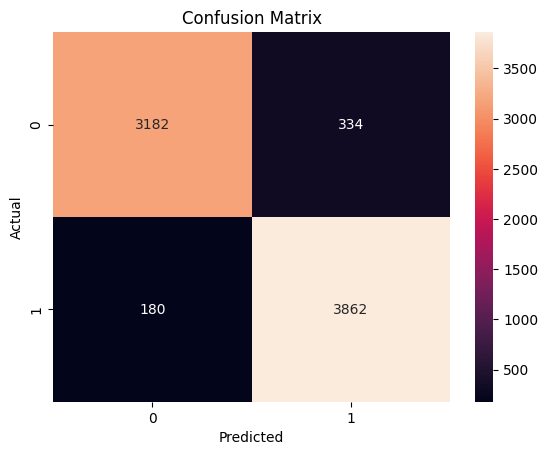

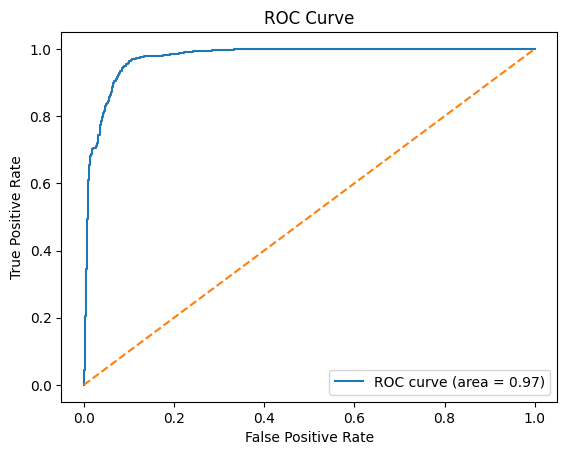


--- Evaluating K Nearest Neighbors ---

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Score: 0.9869012966393226
Recall Score: 0.9821870361207323
ROC-AUC Score: 0.9872539276166802
F1 Score: 0.9876850354521708
Precision Score: 0.9932449337002752
False Positive Rate: 0.007679180887372013
False Negative Rate: 0.017812963879267688
Training Time: 23.92 seconds
Testing Time: 1.14 seconds


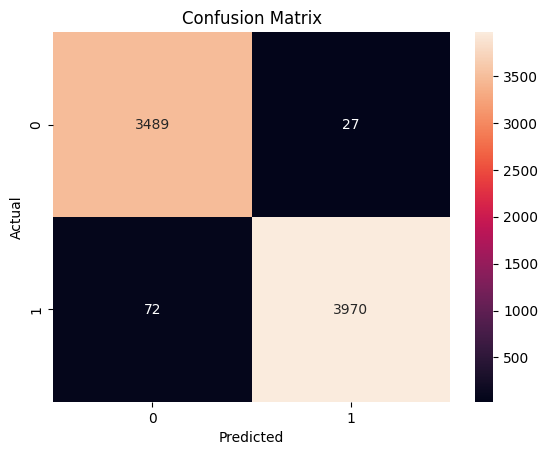

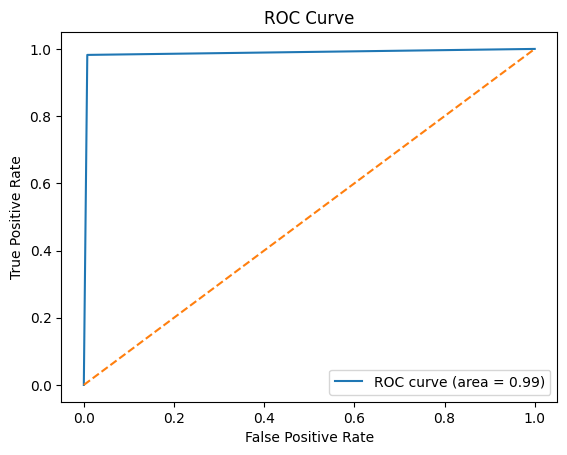


--- Evaluating Decision Tree ---

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Score: 0.9957660756813972
Recall Score: 0.9960415635823849
ROC-AUC Score: 0.9957454689356748
F1 Score: 0.9960415635823849
Precision Score: 0.9960415635823849
False Positive Rate: 0.004550625711035267
False Negative Rate: 0.0039584364176150424
Training Time: 2.22 seconds
Testing Time: 0.00 seconds


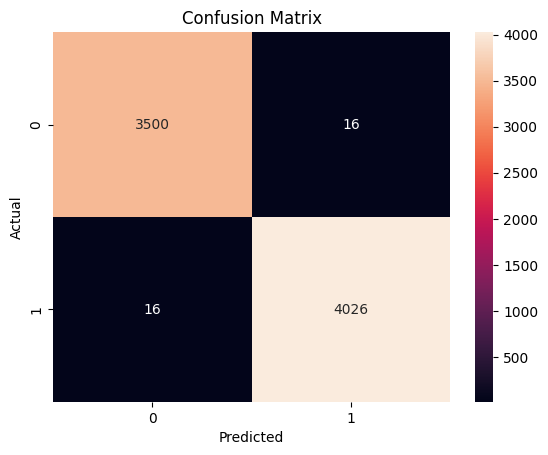

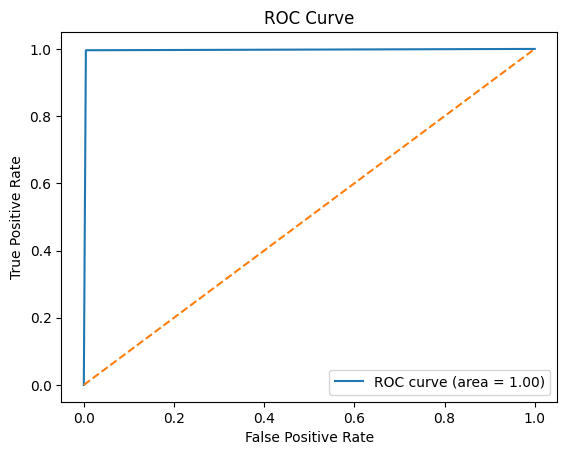

In [ ]:
# Evaluate models
evaluate_model(LogisticRegression(random_state=42), 'Logistic Regression', x_train_selected, y_train, x_test_selected, y_test, feature_names)
evaluate_model(RandomizedSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 21)}, random_state=42, n_iter=10, cv=5, verbose=1, n_jobs=-1), 'K Nearest Neighbors', x_train_selected, y_train, x_test_selected, y_test, feature_names)
evaluate_model(RandomizedSearchCV(DecisionTreeClassifier(), {'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']}, random_state=42, n_iter=10, cv=5, verbose=1, n_jobs=-1), 'Decision Tree', x_train_selected, y_train, x_test_selected, y_test, feature_names)

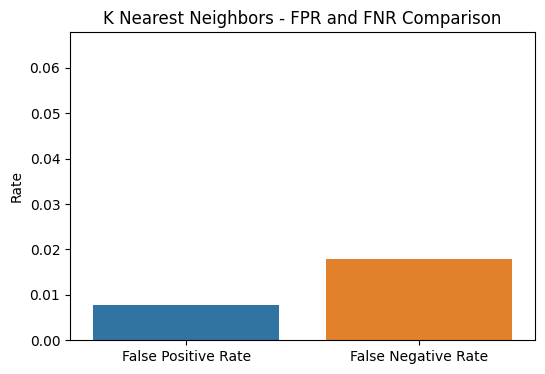

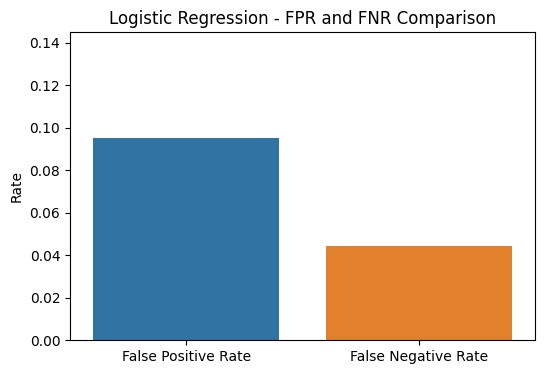

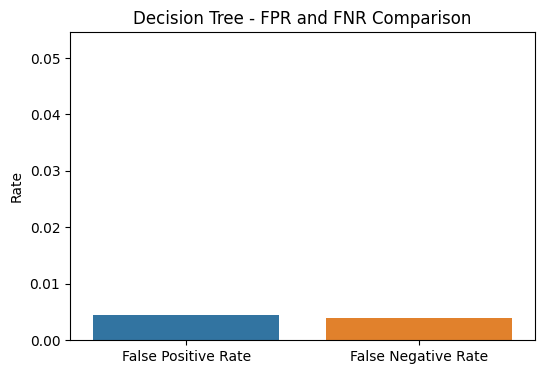

In [ ]:
# Create a DataFrame from the model_performance dictionary
performance_df = pd.DataFrame(model_performance)

# Function to plot FPR and FNR for a given model
def plot_fpr_fnr_for_model(model_name):
    model_data = performance_df[performance_df['Model'] == model_name]
    metrics = ['False Positive Rate', 'False Negative Rate']
    rates = [model_data['False Positive Rate'].values[0], model_data['False Negative Rate'].values[0]]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=metrics, y=rates, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'{model_name} - FPR and FNR Comparison')
    plt.ylabel('Rate')
    plt.ylim(0, max(rates) + 0.05)  # Adjust y-axis limit for better visualization
    plt.show()

# Plotting FPR and FNR for each model
for model in set(model_performance['Model']):
    plot_fpr_fnr_for_model(model)

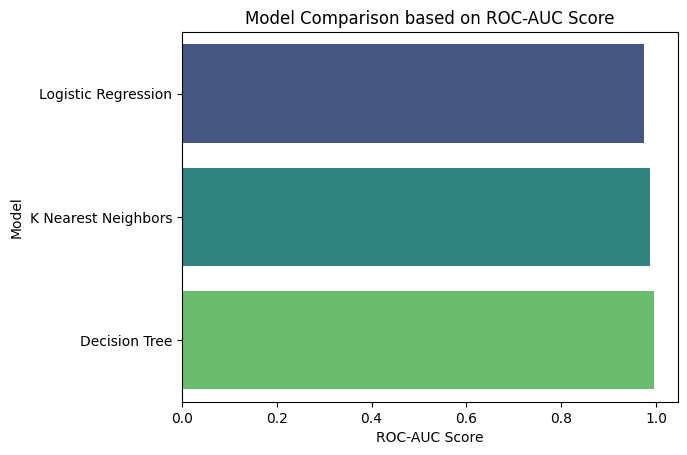

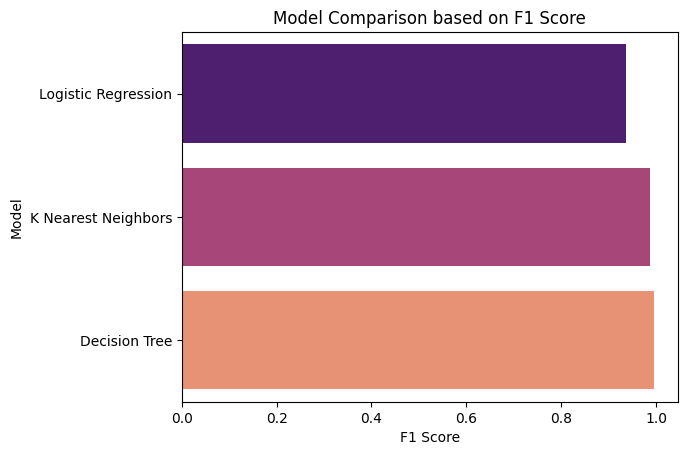

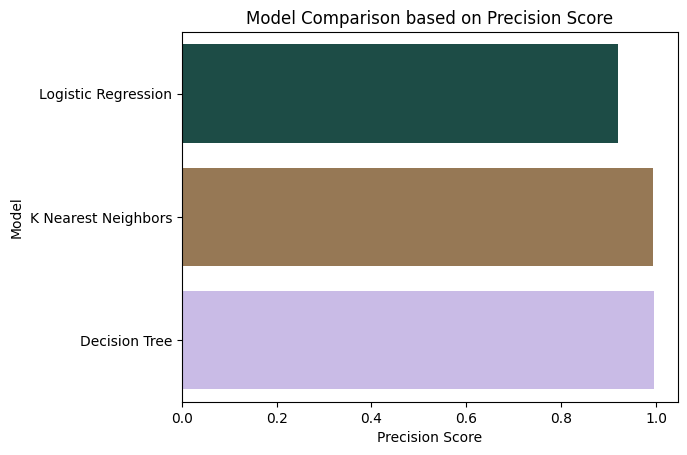

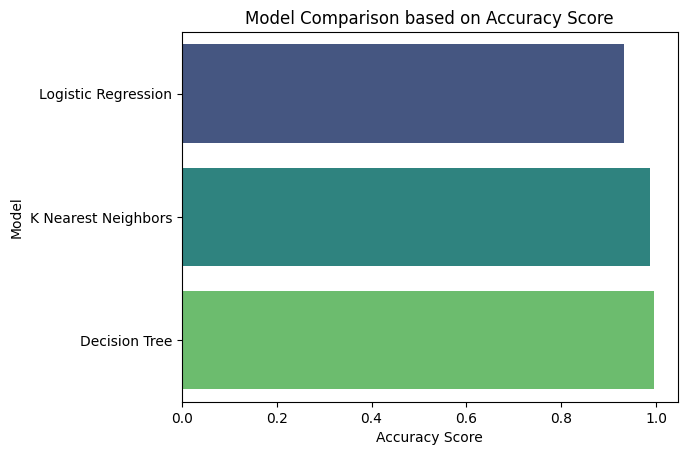

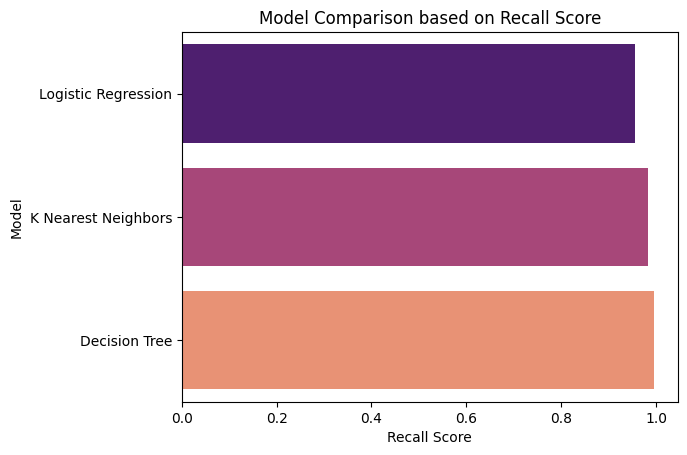

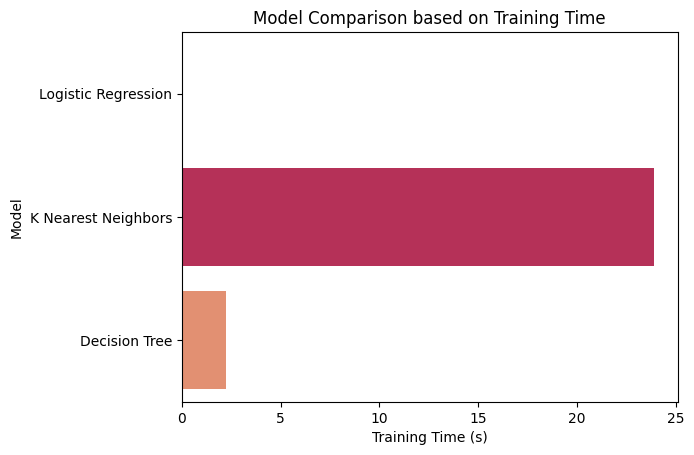

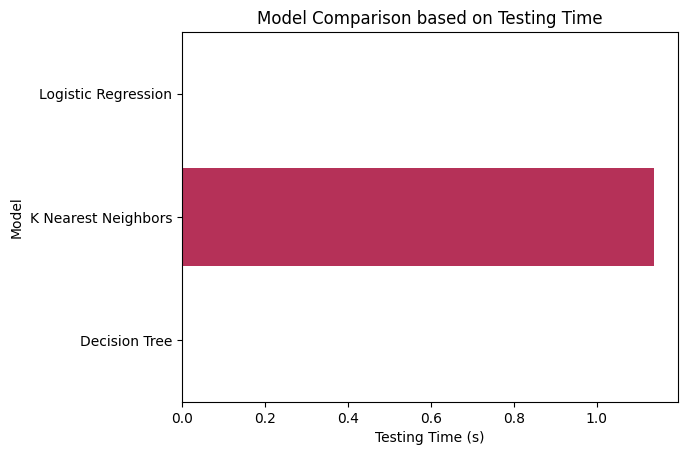

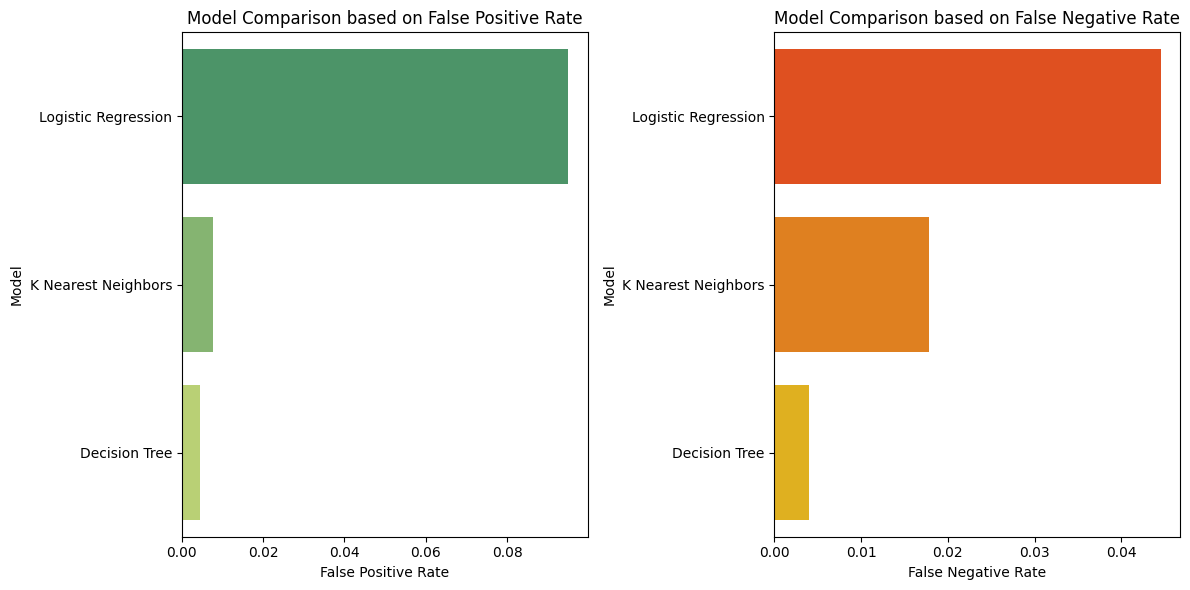

In [ ]:
# Visualization of Model Performance
performance_df = pd.DataFrame(model_performance)
sns.barplot(x='ROC-AUC Score', y='Model', data=performance_df, palette='viridis')
plt.title('Model Comparison based on ROC-AUC Score')
plt.show()

sns.barplot(x='F1 Score', y='Model', data=performance_df, palette='magma')
plt.title('Model Comparison based on F1 Score')
plt.show()

sns.barplot(x='Precision Score', y='Model', data=performance_df, palette='cubehelix')
plt.title('Model Comparison based on Precision Score')
plt.show()

performance_df = pd.DataFrame(model_performance)
sns.barplot(x='Accuracy Score', y='Model', data=performance_df, palette='viridis')
plt.title('Model Comparison based on Accuracy Score')
plt.show()

sns.barplot(x='Recall Score', y='Model', data=performance_df, palette='magma')
plt.title('Model Comparison based on Recall Score')
plt.show()

sns.barplot(x='Training Time (s)', y='Model', data=performance_df, palette='rocket')
plt.title('Model Comparison based on Training Time')
plt.show()

sns.barplot(x='Testing Time (s)', y='Model', data=performance_df, palette='rocket')
plt.title('Model Comparison based on Testing Time')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='False Positive Rate', y='Model', data=performance_df, palette='summer')
plt.title('Model Comparison based on False Positive Rate')

plt.subplot(1, 2, 2)
sns.barplot(x='False Negative Rate', y='Model', data=performance_df, palette='autumn')
plt.title('Model Comparison based on False Negative Rate')
plt.tight_layout()
plt.show()

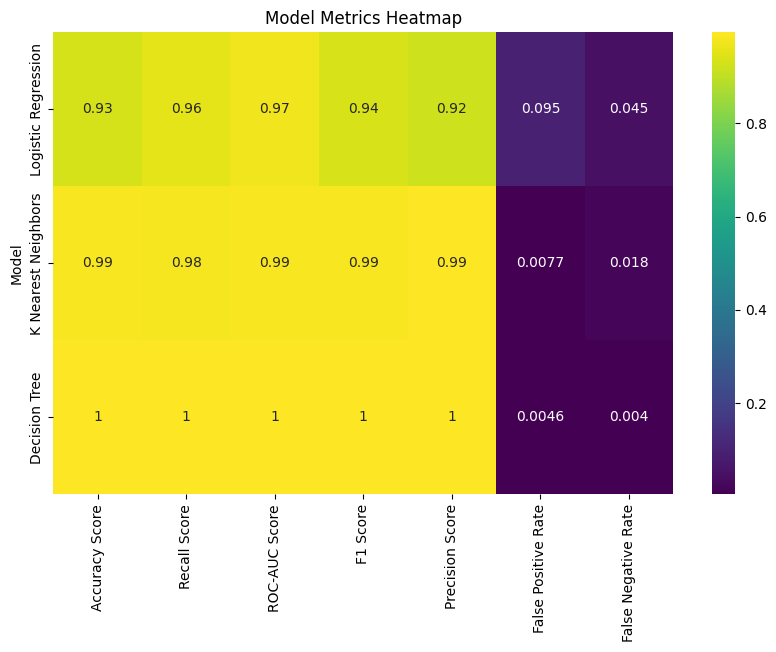

In [ ]:
# Visualization of metrics for each model
performance_df = pd.DataFrame(model_performance)
metrics = ['Accuracy Score', 'Recall Score', 'ROC-AUC Score', 'F1 Score', 'Precision Score', 'False Positive Rate', 'False Negative Rate']

def plot_metrics_heatmap():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(performance_df.set_index('Model')[metrics], annot=True, cmap='viridis', ax=ax)
    plt.title('Model Metrics Heatmap')
    plt.ylabel('Model')
    plt.show()

plot_metrics_heatmap()
